In [ ]:
#____________________________크롤링______________________________________

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time, re
import pandas as pd

In [2]:
driver = webdriver.Chrome("chromedriver.exe")
driver.implicitly_wait(10)
driver.get("https://www.youtube.com/c/%EC%82%AC%EB%82%98%EA%B3%A0/videos") #사나고

In [4]:
SCROLL_PAUSE_TIME = 0.5 

In [5]:
body = driver.find_element_by_tag_name("body")

In [6]:
while True:
    last_height = driver.execute_script("return document.documentElement.scrollHeight") #현재 화면의 길이
    print("last_height: ", last_height)
    
    for i in range(10):
        body.send_keys(Keys.END)
        time.sleep(SCROLL_PAUSE_TIME) 
        
    new_height = driver.execute_script("return document.documentElement.scrollHeight") #스크롤 후 화면 길이
    print("new_height: ", new_height)
    
    if new_height == last_height: 
        break 

last_height:  3920
new_height:  6868
last_height:  6868
new_height:  6868


In [7]:
page = driver.page_source 
soup = BeautifulSoup(page, "lxml")

In [8]:
all_videos = soup.find_all(id = "dismissable")

In [9]:
title_list = []

for video in all_videos:
    title = video.find(id = "video-title")
    if len(title.text.strip()) > 0:
        title_list.append(title.text)

title_list

['누가 요즘 이걸 돈주고 삽니까',
 '벽수리한거 전시합니다',
 '3D펜으로 벽 수리하기(2020 ver.)',
 '3D펜으로 만든 카트라이더 러쉬플러스',
 '칫 결계인가',
 'CPU쿨러로 아크원자로 만들기',
 '3D펜으로 조선시대 갓 만들기 (feat.넷플릭스 킹덤)',
 '3D펜으로 기미독립선언서 만들기',
 '장인의 디아블로 만들기',
 '위쳐 검 만들기',
 '소닉 만드는 장인',
 '3d펜으로 담벼락 수리하기',
 '악마의단검으로 악마 베기(vs 긱블)',
 '저 새이름이 뭔가요?',
 '오이를 써는 영상',
 "'집행검'만들어서 오이 베기",
 "3D펜으로 만든 독도의 '도로명주소'",
 '3D펜으로 독도에 다리 만들기',
 '3D펜으로 오래된 버스정류장 수리하기',
 '3D펜 장인이 만든 환상적인 무드등',
 '튼튼하고 이상한 다리 만들기',
 '3D펜으로 라그나로스 만들기',
 '빛나는 돌 만들기',
 '3D펜으로 피규어 만들기',
 '3D펜으로 공원 수리하기',
 '동상 만들기',
 '3D펜으로 고래만들기',
 '갈라진 벽에 덩굴 만들기',
 '3D펜으로 풍차 만들기',
 '3D펜으로 부서진 벽 공사하기',
 '3D펜으로 그림 그리기',
 '3D펜으로 선인장만들면서 공지하기',
 '3D펜으로 부서진 벽 꾸미기',
 '딱총나무지팡이로 오이 폭파하기',
 '3D펜으로 벽 수리하기',
 '3D펜으로 겐지 표창 만들어서 오이베기',
 '오이보다 더 무서운 ‘그 인형’',
 '나고가 3D펜을 드립니다(40만 이벤트)',
 '그 펭귄 피규어 만들기',
 '3D펜으로 겐지 용검 만들어서 촛불 10개 끄기 (긱블 vs 사나고)',
 '3D펜 장인의 이상한 3D펜 이상한 리뷰',
 '3D펜으로 인피니티 건틀렛 만들어서 오이 반으로 없애기',
 '3D펜 장인이 추천하는 어린이용 3D펜',
 '3D펜으로 서리한만들어서 오이 베기',
 '3D펜으로 만든 쿠나이로 오이 베기',
 '갑옷입은 계란을 1m에서 떨어트려도 안 깨질까?',
 'Create Death

In [10]:
video_time_list = []

for video in all_videos:
    video_time = video.find("span", {"class" : "style-scope ytd-thumbnail-overlay-time-status-renderer"})
    video_time_list.append(video_time.text.strip())

video_time_list

['5:05',
 '6:27',
 '3:48',
 '16:04',
 '5:30',
 '15:22',
 '12:20',
 '8:53',
 '18:32',
 '15:26',
 '17:32',
 '6:07',
 '11:58',
 '8:55',
 '4:01',
 '12:51',
 '4:53',
 '5:40',
 '5:24',
 '6:05',
 '6:39',
 '10:53',
 '5:18',
 '10:15',
 '3:39',
 '5:24',
 '7:14',
 '3:53',
 '7:25',
 '4:04',
 '9:24',
 '1:33',
 '4:08',
 '4:44',
 '4:12',
 '7:43',
 '8:36',
 '1:23',
 '4:31',
 '11:35',
 '2:37',
 '10:15',
 '1:59',
 '11:03',
 '6:10',
 '2:43',
 '17:54',
 '2:55',
 '5:42',
 '7:30',
 '7:19',
 '12:52',
 '1:34',
 '11:12',
 '11:12',
 '10:29',
 '10:04',
 '8:15',
 '1:10',
 '10:03',
 '6:29',
 '1:59:09',
 '14:57',
 '0:27',
 '3:56',
 '11:25',
 '8:38',
 '7:14',
 '2:32',
 '10:07',
 '3:48',
 '8:37',
 '8:37',
 '11:27',
 '10:36',
 '3:09',
 '5:31',
 '10:48',
 '9:46',
 '6:42',
 '6:52',
 '9:08',
 '8:14',
 '9:01',
 '2:37',
 '5:53',
 '3:51',
 '7:31',
 '3:27',
 '11:36',
 '18:40',
 '1:29',
 '2:57',
 '3:41',
 '1:30',
 '1:19',
 '13:16',
 '7:58',
 '0:59',
 '4:07',
 '6:55',
 '7:06',
 '5:05',
 '4:38',
 '7:42',
 '7:27',
 '3:02',
 '4:0

In [11]:
video_time_seperate_list = []

for time in video_time_list:
    time_list = time.split(":") 
    if len(time_list) < 3:
        video_time_seperate_list.append(int(time_list[0]) * 60 + int(time_list[1])) #분초
    else:
        video_time_seperate_list.append(int(time_list[0]) * 3600 + int(time_list[1]) * 60 + int(time_list[2])) #시분초
        
video_time_seperate_list

[305,
 387,
 228,
 964,
 330,
 922,
 740,
 533,
 1112,
 926,
 1052,
 367,
 718,
 535,
 241,
 771,
 293,
 340,
 324,
 365,
 399,
 653,
 318,
 615,
 219,
 324,
 434,
 233,
 445,
 244,
 564,
 93,
 248,
 284,
 252,
 463,
 516,
 83,
 271,
 695,
 157,
 615,
 119,
 663,
 370,
 163,
 1074,
 175,
 342,
 450,
 439,
 772,
 94,
 672,
 672,
 629,
 604,
 495,
 70,
 603,
 389,
 7149,
 897,
 27,
 236,
 685,
 518,
 434,
 152,
 607,
 228,
 517,
 517,
 687,
 636,
 189,
 331,
 648,
 586,
 402,
 412,
 548,
 494,
 541,
 157,
 353,
 231,
 451,
 207,
 696,
 1120,
 89,
 177,
 221,
 90,
 79,
 796,
 478,
 59,
 247,
 415,
 426,
 305,
 278,
 462,
 447,
 182,
 249,
 245,
 246,
 400,
 172,
 562,
 61,
 24]

In [12]:
view_num_list = []
view_num_regexp = re.compile(r"조회수")

for video in all_videos:
    view_num = video.find("span", {"class" : "style-scope ytd-grid-video-renderer"})
    
    if view_num_regexp.search(view_num.text):
        view_num_list.append(view_num.text)

view_num_list

['조회수 184만회',
 '조회수 262만회',
 '조회수 522만회',
 '조회수 302만회',
 '조회수 388만회',
 '조회수 210만회',
 '조회수 802만회',
 '조회수 226만회',
 '조회수 351만회',
 '조회수 312만회',
 '조회수 1196만회',
 '조회수 260만회',
 '조회수 253만회',
 '조회수 161만회',
 '조회수 136만회',
 '조회수 144만회',
 '조회수 125만회',
 '조회수 309만회',
 '조회수 429만회',
 '조회수 177만회',
 '조회수 238만회',
 '조회수 280만회',
 '조회수 266만회',
 '조회수 444만회',
 '조회수 403만회',
 '조회수 372만회',
 '조회수 386만회',
 '조회수 572만회',
 '조회수 220만회',
 '조회수 945만회',
 '조회수 256만회',
 '조회수 82만회',
 '조회수 2299만회',
 '조회수 166만회',
 '조회수 2686만회',
 '조회수 112만회',
 '조회수 132만회',
 '조회수 44만회',
 '조회수 170만회',
 '조회수 872만회',
 '조회수 106만회',
 '조회수 387만회',
 '조회수 158만회',
 '조회수 577만회',
 '조회수 215만회',
 '조회수 267만회',
 '조회수 426만회',
 '조회수 286만회',
 '조회수 86만회',
 '조회수 97만회',
 '조회수 71만회',
 '조회수 130만회',
 '조회수 35만회',
 '조회수 9.3만회',
 '조회수 183만회',
 '조회수 122만회',
 '조회수 32만회',
 '조회수 162만회',
 '조회수 18만회',
 '조회수 260만회',
 '조회수 164만회',
 '조회수 40만회',
 '조회수 296만회',
 '조회수 10만회',
 '조회수 80만회',
 '조회수 119만회',
 '조회수 111만회',
 '조회수 23만회',
 '조회수 21만회',
 '조회수 176만회',
 '조회수 117만회',
 '조회수 7만회',
 '조회

In [13]:
view_number_type_list = [] 

for view in view_num_list:
    view = view.replace("조회수", "") 
    num = float(view[:-2]) 
    danwee = view[-2:]
    
    if danwee == "만회":
        view_number_type_list.append(int(num * 10000))
    else:
        view_number_type_list.append(int(num * 1000))

view_number_type_list

[1840000,
 2620000,
 5220000,
 3020000,
 3880000,
 2100000,
 8020000,
 2260000,
 3510000,
 3120000,
 11960000,
 2600000,
 2530000,
 1610000,
 1360000,
 1440000,
 1250000,
 3090000,
 4290000,
 1770000,
 2380000,
 2800000,
 2660000,
 4440000,
 4030000,
 3720000,
 3860000,
 5720000,
 2200000,
 9450000,
 2560000,
 820000,
 22990000,
 1660000,
 26860000,
 1120000,
 1320000,
 440000,
 1700000,
 8720000,
 1060000,
 3870000,
 1580000,
 5770000,
 2150000,
 2670000,
 4260000,
 2860000,
 860000,
 970000,
 710000,
 1300000,
 350000,
 93000,
 1830000,
 1220000,
 320000,
 1620000,
 180000,
 2600000,
 1640000,
 400000,
 2960000,
 100000,
 800000,
 1190000,
 1110000,
 230000,
 210000,
 1760000,
 1170000,
 70000,
 1090000,
 940000,
 3930000,
 2050000,
 470000,
 7970000,
 4980000,
 140000,
 460000,
 180000,
 750000,
 980000,
 570000,
 1380000,
 720000,
 720000,
 400000,
 97000,
 270000,
 630000,
 50000,
 45000,
 61000,
 100000,
 270000,
 1900000,
 380000,
 990000,
 360000,
 450000,
 61000,
 140000,
 115

In [14]:
dict_youtube = {
    "title" : title_list,
    "video_time" : video_time_seperate_list,
    "view_num" : view_number_type_list
}

In [15]:
youtube = pd.DataFrame(dict_youtube)
youtube

,title,video_time,view_num
0,누가 요즘 이걸 돈주고 삽니까,305,1840000
1,벽수리한거 전시합니다,387,2620000
2,3D펜으로 벽 수리하기(2020 ver.),228,5220000
3,3D펜으로 만든 카트라이더 러쉬플러스,964,3020000
4,칫 결계인가,330,3880000
...,...,...,...
110,[3D_PEN] 이말년 만들기 (침착맨),400,110000
111,[3D_PEN] 페페 만들기,172,100000
112,[3D_PEN] 우왁굳 피규어 만들기,562,290000
113,욕하는 새 (우왁굳 반응),61,2700000


In [16]:
driver.quit()

In [17]:
#____________________________텍스트 분석______________________________________

In [18]:
from konlpy.tag import Twitter

In [19]:
twitter = Twitter() #문장을 단어 단위로 나누고, 단어/품사를 리턴

C:\ai\python\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [20]:
tagged = twitter.pos(youtube["title"][0]) #.pos(): 텍스트에 품사 정보를 부착해 반환
tagged

[('누가', 'Noun'),
 ('요즘', 'Noun'),
 ('이', 'Determiner'),
 ('걸', 'Noun'),
 ('돈', 'Noun'),
 ('주고', 'Verb'),
 ('삽', 'Noun'),
 ('니까', 'Josa')]

In [21]:
tagged = twitter.pos(youtube["title"][0], stem = True) 
#stem = True 단어의 원형을 찾아줌

tagged

[('누가', 'Noun'),
 ('요즘', 'Noun'),
 ('이', 'Determiner'),
 ('걸', 'Noun'),
 ('돈', 'Noun'),
 ('주다', 'Verb'),
 ('삽', 'Noun'),
 ('니까', 'Josa')]

In [22]:
for i in range(0, len(tagged)):
    if (tagged[i][1] == "Noun"): #품사가 명사인 것만 출력
        print(tagged[i])

('누가', 'Noun')
('요즘', 'Noun')
('걸', 'Noun')
('돈', 'Noun')
('삽', 'Noun')


In [23]:
for i in range(0, len(tagged)):
    if (tagged[i][1] == "Noun"): #품사가 명사인 것 중 단어만 출력(품사 태그 제거)
        print(tagged[i][0])

누가
요즘
걸
돈
삽


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name) #폰트 설정

C:\ai\python\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ai\python\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


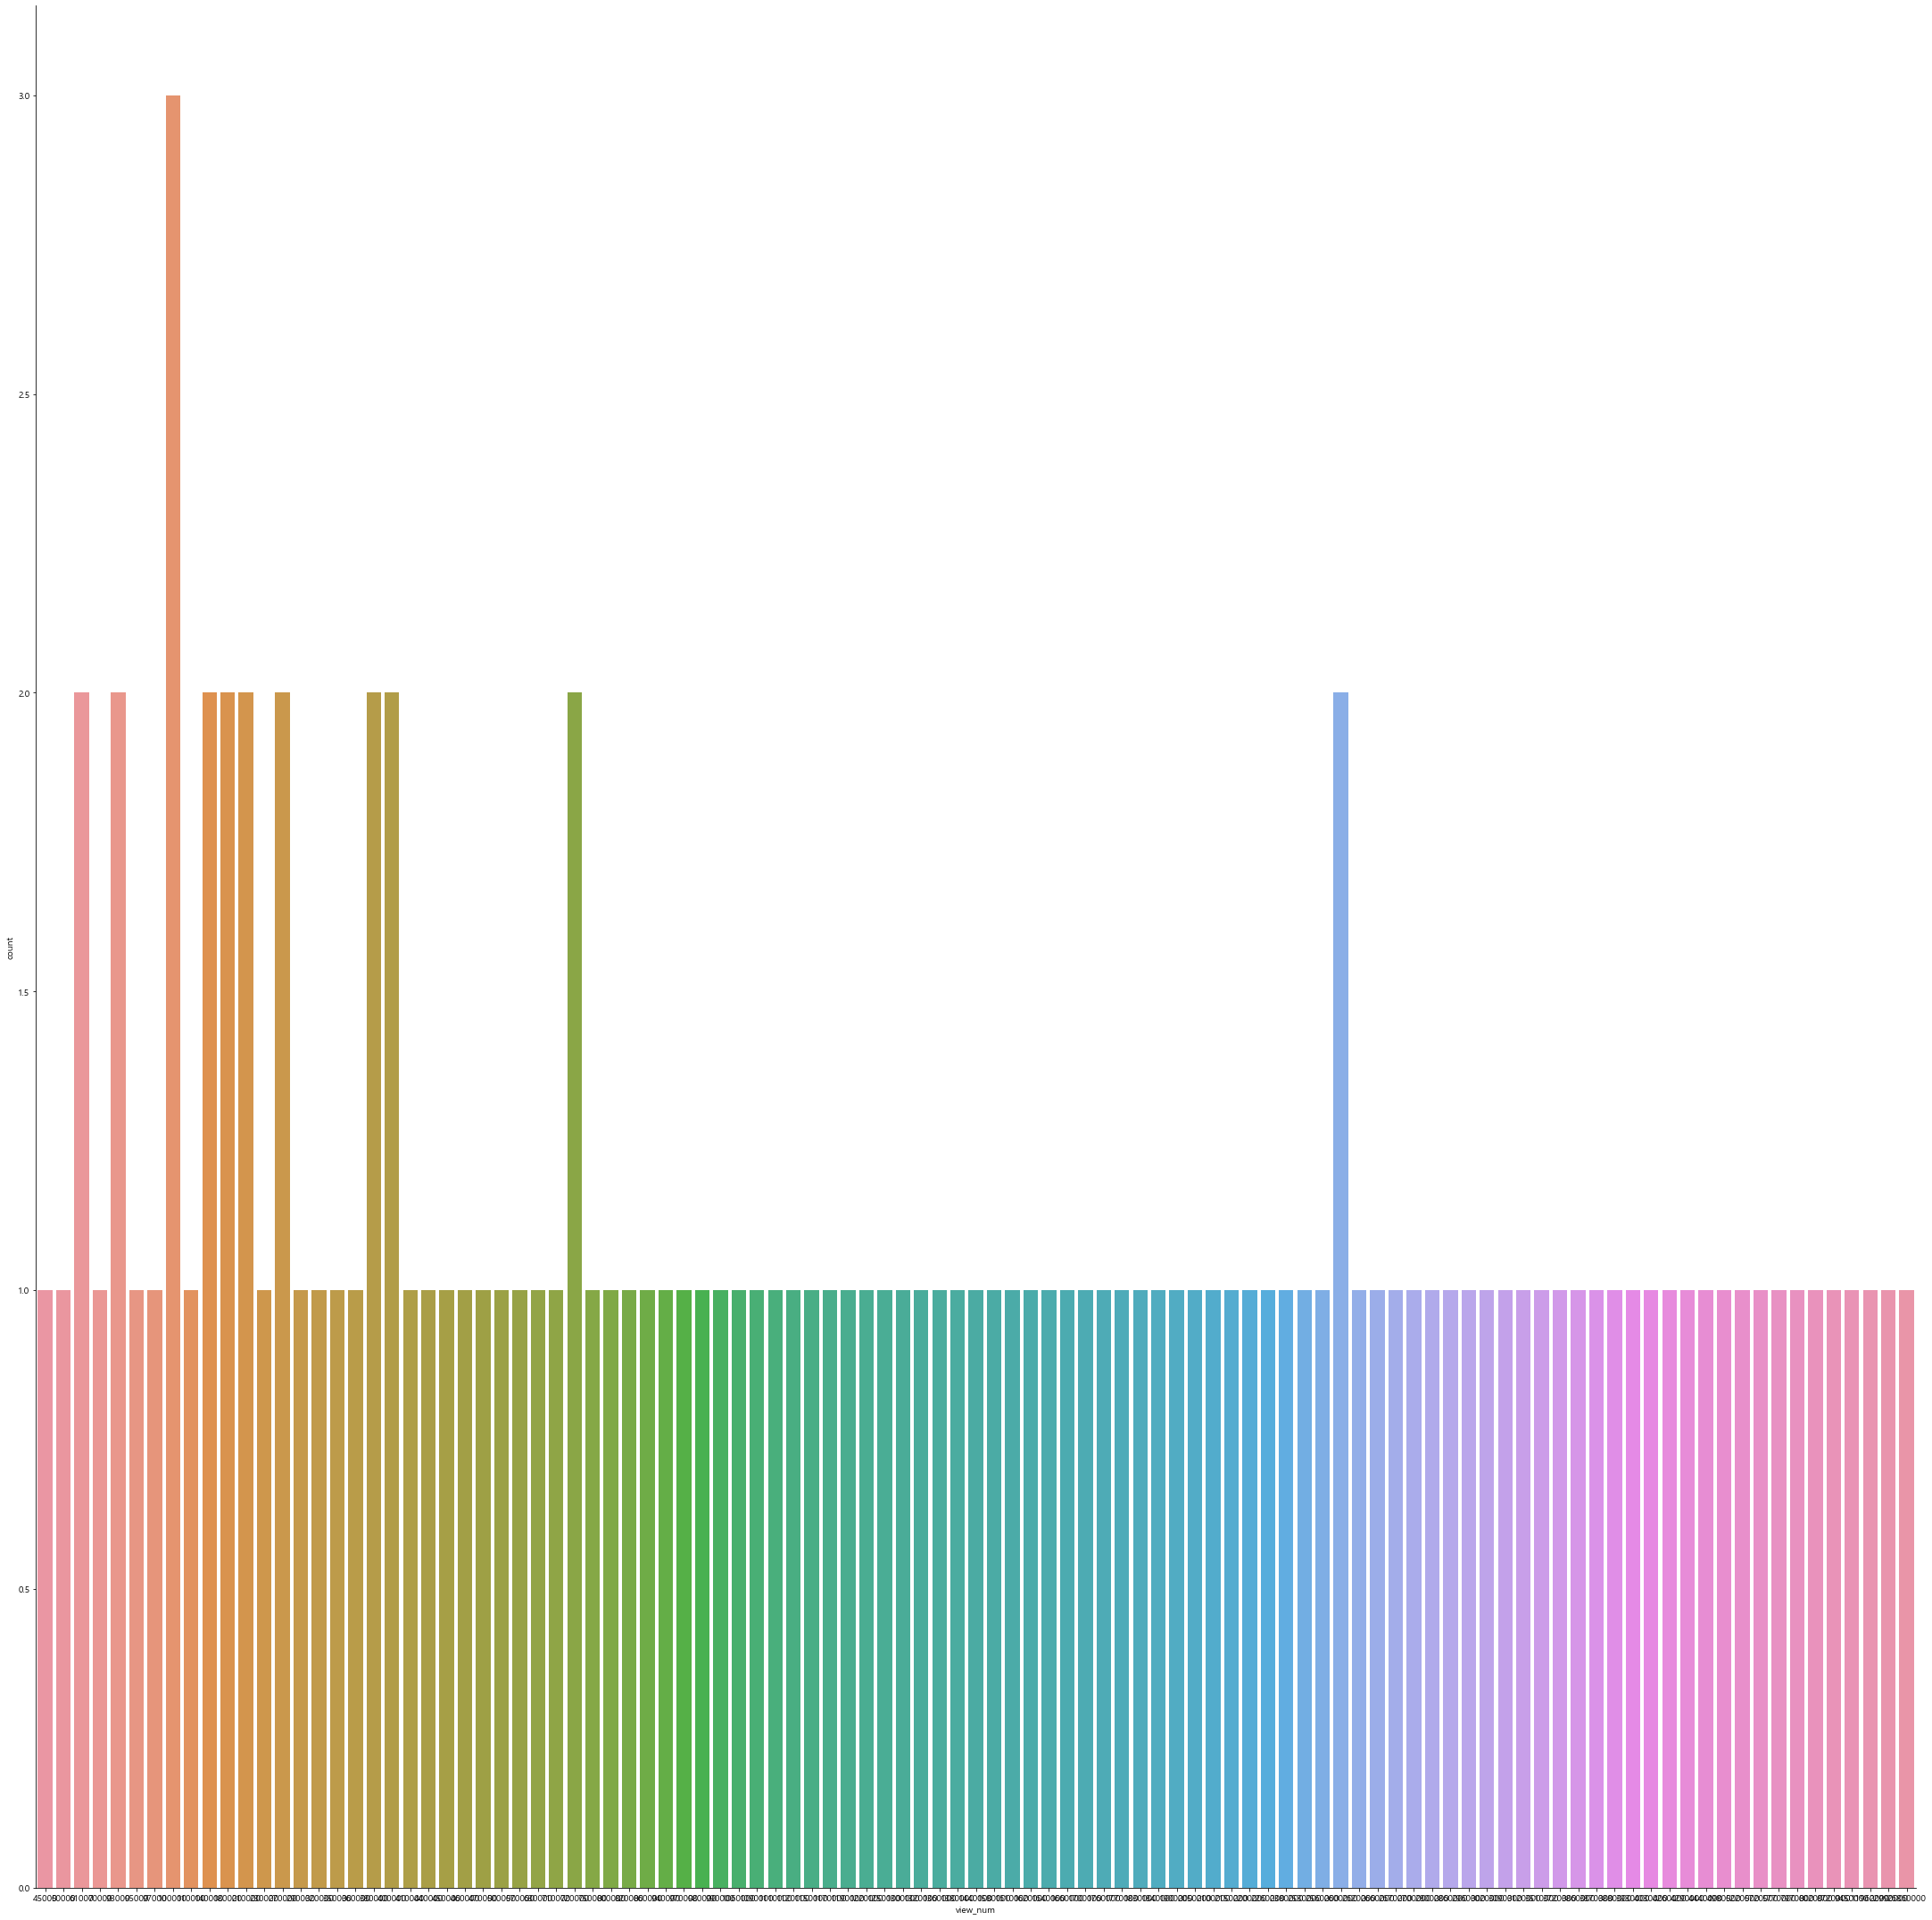

In [26]:
#조회수 그래프화
g = sns.factorplot("view_num", data = youtube, kind = "count", size = 30)
g.set_xlabels() 

In [27]:
youtube = youtube.dropna(subset = ["view_num"]) #조회수가 null 인 줄 삭제
youtube["view_num2"] = 0 #컬럼 생성 및 초기화

In [28]:
youtube.head()

,title,video_time,view_num,view_num2
0,누가 요즘 이걸 돈주고 삽니까,305,1840000,0
1,벽수리한거 전시합니다,387,2620000,0
2,3D펜으로 벽 수리하기(2020 ver.),228,5220000,0
3,3D펜으로 만든 카트라이더 러쉬플러스,964,3020000,0
4,칫 결계인가,330,3880000,0


In [38]:
for index in range(len(youtube)):
    #youtube "view_num" 컬럼의 index번째 데이터를 view_num에 대입
    view_num = youtube["view_num"][index] 
    if(view_num < 500000):
        youtube["view_num2"][index] = 0
    elif(view_num < 1000000):
        youtube["view_num2"][index] = 1
    elif(view_num < 1500000):
        youtube["view_num2"][index] = 2
    elif(view_num < 2000000):
        youtube["view_num2"][index] = 3
    else:
        youtube["view_num2"][index] = 4

youtube.head()

C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ai

,title,video_time,view_num,view_num2
0,누가 요즘 이걸 돈주고 삽니까,305,1840000,3
1,벽수리한거 전시합니다,387,2620000,4
2,3D펜으로 벽 수리하기(2020 ver.),228,5220000,4
3,3D펜으로 만든 카트라이더 러쉬플러스,964,3020000,4
4,칫 결계인가,330,3880000,4


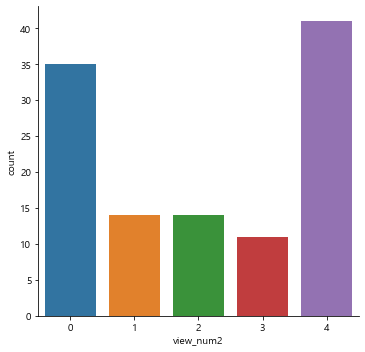

In [39]:
g = sns.factorplot("view_num2", data = youtube, kind = "count", size = 5)
g.set_xlabels()

In [40]:
#___________________________데이터 전처리______________________________________

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split

In [42]:
#train, test data 설정
X_train, X_test, y_train, y_test = train_test_split(youtube["title"], youtube["view_num2"])

In [43]:
X_train

14                           오이를 써는 영상
113                     욕하는 새 (우왁굳 반응)
24                       3D펜으로 공원 수리하기
68                        사나고샵 오픈했습니다!
57              3D펜 장인의 위베어베어스 피규어 만들기
                    ...               
10                           소닉 만드는 장인
66                     3D펜 장인의 피규어 만들기
6      3D펜으로 조선시대 갓 만들기 (feat.넷플릭스 킹덤)
61                        2019년 기념 Q&A
21                     3D펜으로 라그나로스 만들기
Name: title, Length: 86, dtype: object

In [44]:
y_train

14     2
113    4
24     4
68     0
57     3
      ..
10     4
66     2
6      4
61     0
21     4
Name: view_num2, Length: 86, dtype: int64

In [45]:
#명사와 형용사만을 리턴하는 함수
def getNounAndAdject(text): 
    stems = []
    tagged = twitter.pos(text, stem = True)
    for i in range(0, len(tagged)):
        if(tagged[i][1] == "Noun" or tagged[i][1] == "Adjective"):
            stems.append(tagged[i][0])
    return stems

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)
#가중치 부여

#문자열의 tfidf를 계산하는 객체
vectorizer = TfidfVectorizer(min_df = 2, tokenizer = getNounAndAdject)

In [47]:
X_train_vector = vectorizer.fit_transform(X_train) #학습데이터의 tfidf
X_test_vector = vectorizer.transform(X_test) #테스트데이터의 tfidf

In [48]:
df_tfidf1 = pd.DataFrame(X_train_vector.A, columns = vectorizer.get_feature_names()) #X_train_vector를 데이터 프레임으로 변환
df_tfidf1

,가면,개,건틀렛,검,고양이,공지,굳다,규어,그,긱블,...,아이언맨,어스,영상,오이,용,위,유기,장인,펜,피
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.743068,0.669216,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.460941,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.440646,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.549967,0.0,0.440646,0.246473,0.440646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.527602,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.527602,0.295112,0.527602
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.726717,0.000000
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [49]:
df_tfidf2 = pd.DataFrame(X_test_vector.A, columns = vectorizer.get_feature_names()) #X_test_vector를 데이터 프레임으로 변환
df_tfidf2

,가면,개,건틀렛,검,고양이,공지,굳다,규어,그,긱블,...,아이언맨,어스,영상,오이,용,위,유기,장인,펜,피
0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.527602,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.527602,0.295112,0.527602
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.872750,0.488168,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.726717,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.792449,0.443253,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.895279,0.0,0.0,0.0,0.000000,0.445507,0.000000


In [ ]:
#___________________________Decision Tree______________________________________

In [50]:
#모델 성능 평가
from sklearn.metrics import classification_report, confusion_matrix

#data set 분할
from sklearn.model_selection import train_test_split

#Decision Tree 알고리즘 서브 패키지
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

#IPython 내에 정보를 보여주는 도구용 공용 API
#Image : raw 데이터가 있는 PNG, JPEG 이미지 객체를 만드는 모듈
from IPython.display import Image

import pandas as pd
import numpy as np

#그래프를 생성하는 graphviz의 Dot 언어를 파이썬 인터페이스에 제공하는 모듈
import pydotplus

#운영체제와 상호작용하기 위한 기본적인 기능
import os

In [51]:
df_clf = DecisionTreeClassifier()
df_clf = df_clf.fit(X_train_vector, y_train)
df_prediction = df_clf.predict(X_test_vector)

In [52]:
df_prediction

array([2, 4, 4, 0, 0, 2, 4, 0, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 4,
       0, 4, 1, 0, 0, 0, 4], dtype=int64)

In [53]:
y_test

50     1
54     3
103    0
108    0
107    0
33     3
60     3
13     3
47     4
35     2
97     3
43     4
19     3
32     4
67     0
102    0
16     2
40     2
62     4
84     1
4      4
65     2
71     0
48     1
49     1
31     1
95     0
55     2
56     0
Name: view_num2, dtype: int64

In [54]:
confusion_matrix(y_test, df_prediction) #모델 성능 평가

array([[6, 0, 0, 0, 2],
       [1, 1, 1, 0, 2],
       [1, 0, 0, 0, 4],
       [1, 0, 1, 0, 4],
       [2, 0, 0, 0, 3]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, df_prediction)
print("정확도", accuracy)

정확도 0.3448275862068966


In [57]:
from sklearn.tree import export_graphviz

export_graphviz(
    df_clf,
    out_file = "youtube_tree.dot",
    feature_names = df_tfidf1.columns,
    class_names = ["so bad", "bad", "normal", "good", "so good"],
    rounded = True,
    filled = True
)

In [58]:
import graphviz

with open("youtube_tree.dot", encoding = "UTF-8") as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph, encoding = "UTF-8")

In [63]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

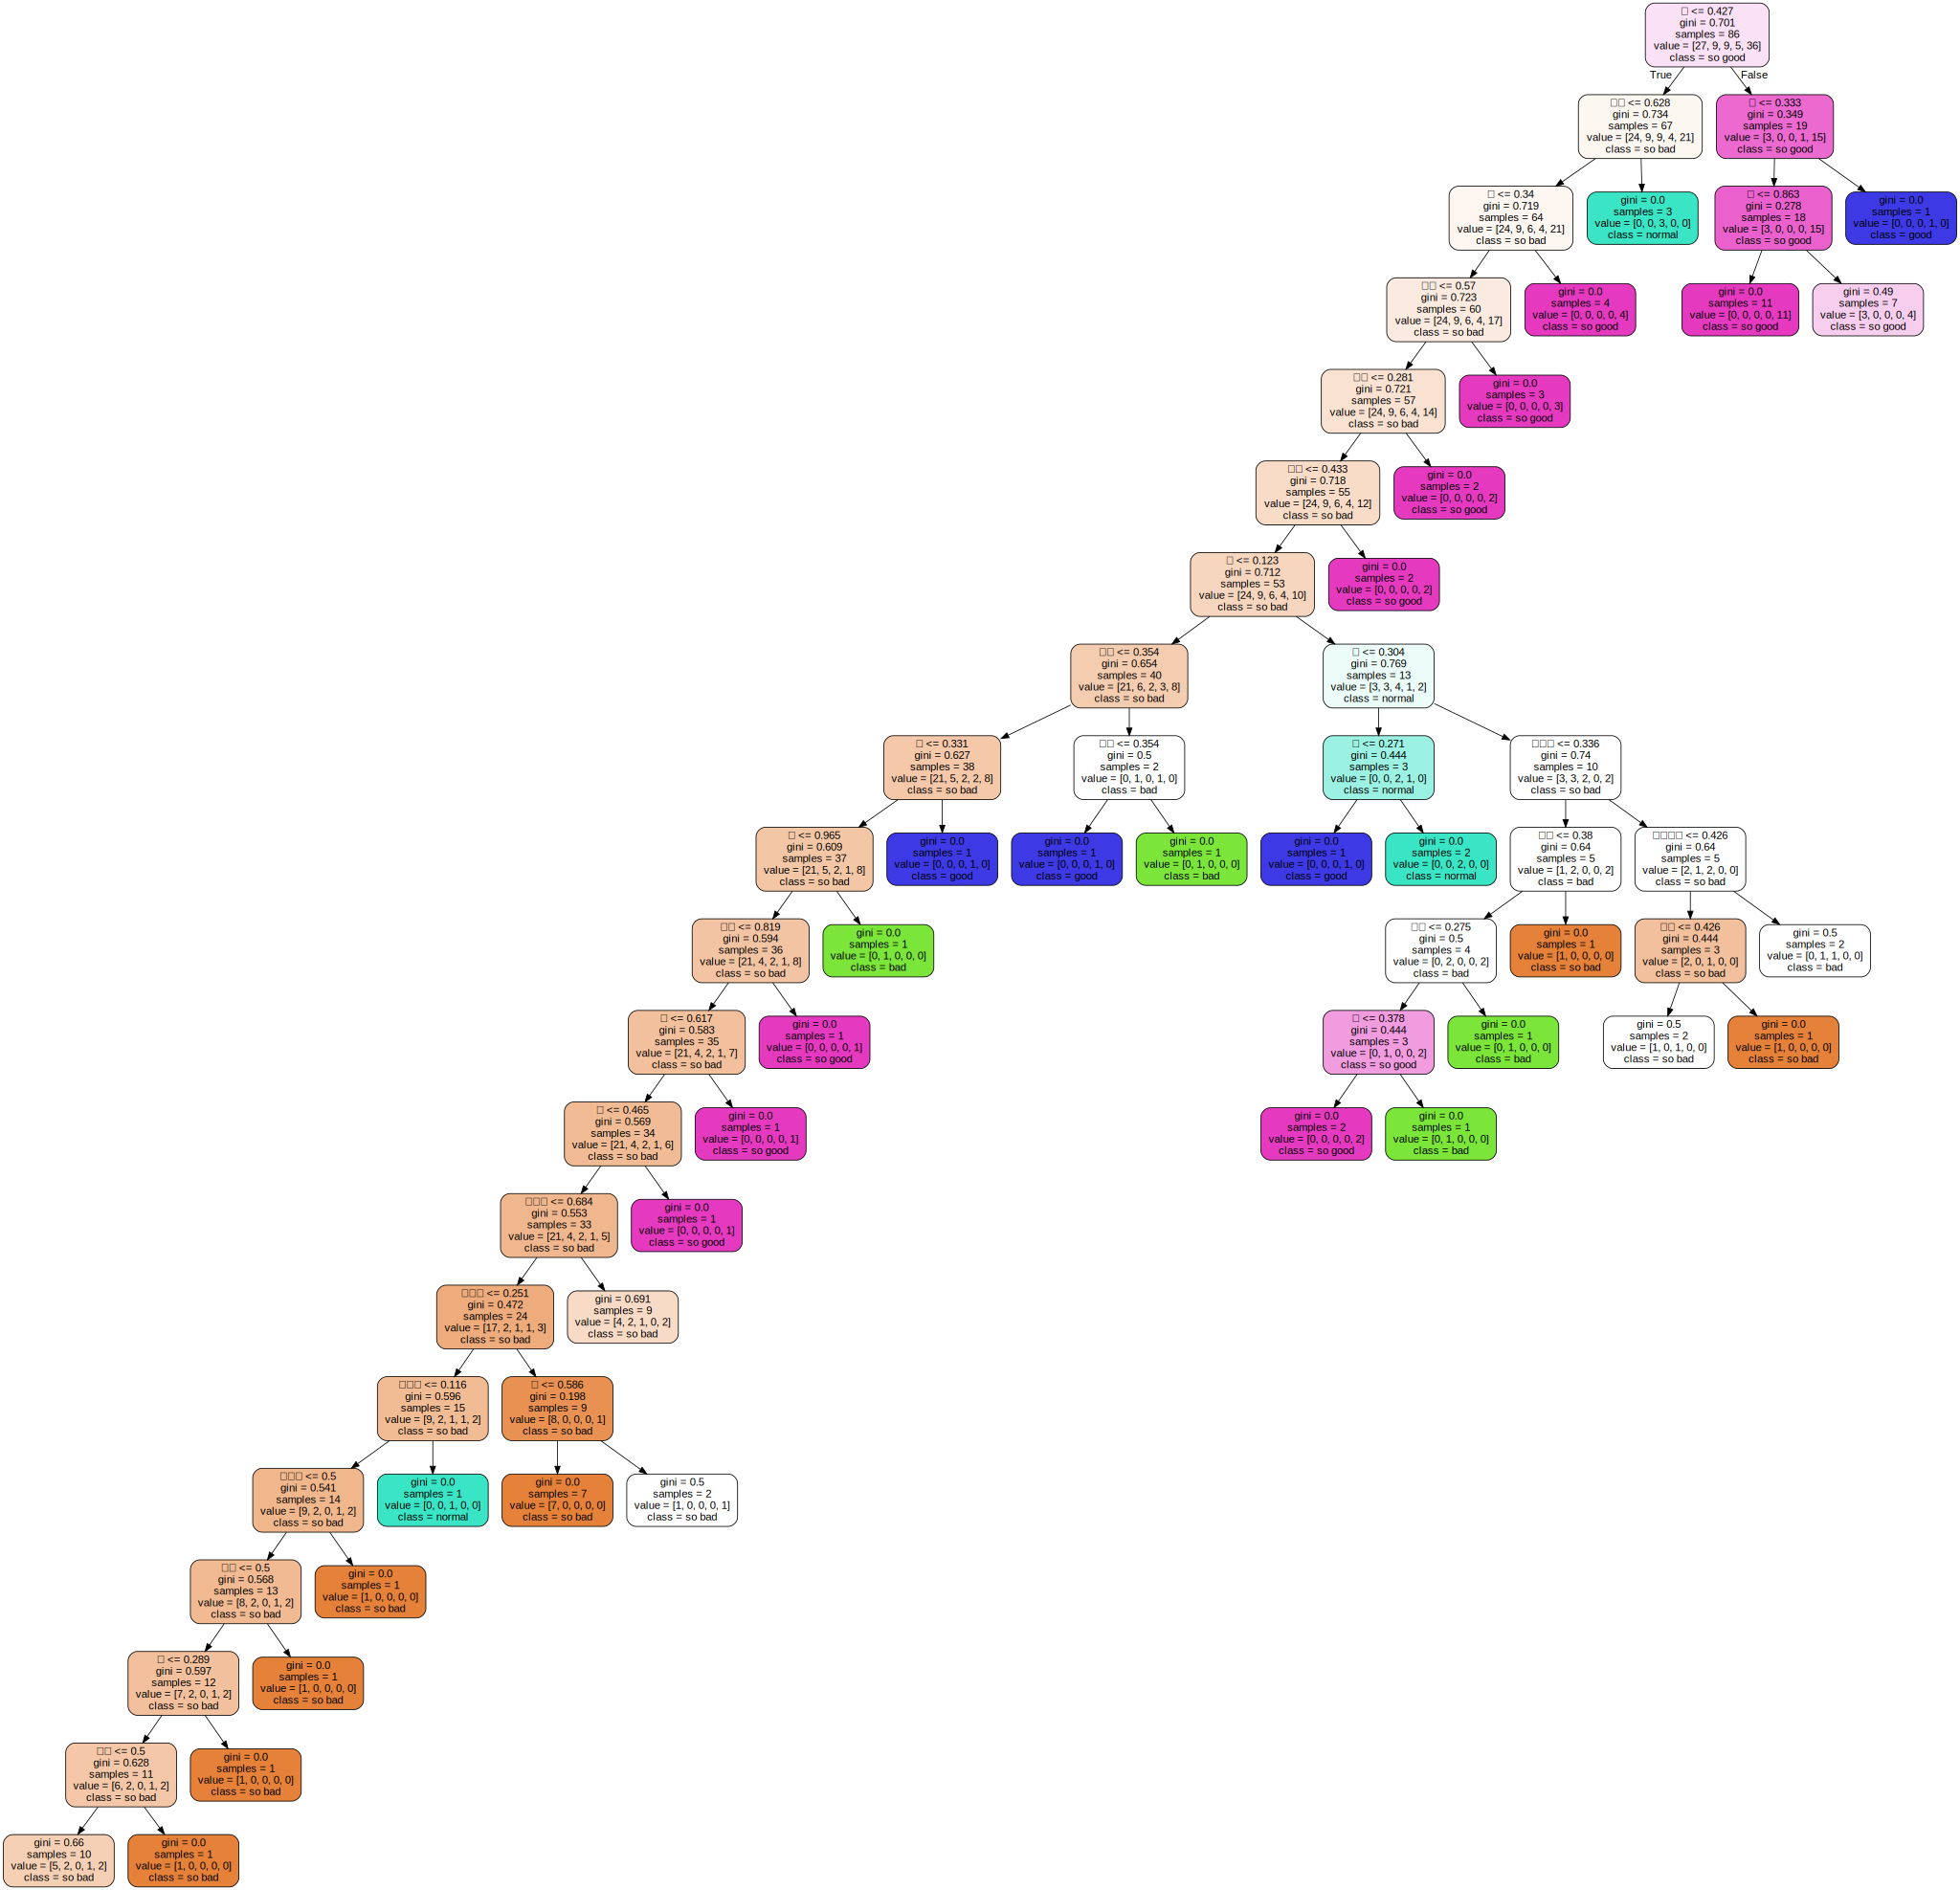

In [64]:
dot